In [22]:
# import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from raceplotly.plots import barplot

In [23]:
df = pd.read_csv("data/co2-emissions-1960-2018.csv", index_col="Country Name")

df.shape

(266, 59)

In [24]:
df1 = df.transpose()
df1.index = pd.to_datetime(df1.index).year
df1.head()

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,204.631696,0.906060,0.046057,0.090880,0.100835,1.258195,NaN,0.609268,0.119037,2.383343,...,NaN,0.181947,NaN,3.121158,0.135031,NaN,0.011038,5.727223,NaN,NaN
1961,208.837879,0.922474,0.053589,0.095283,0.082204,1.374186,NaN,0.662618,0.109136,2.458551,...,NaN,0.183099,NaN,3.068090,0.163542,NaN,0.013599,5.832621,NaN,NaN
1962,226.081890,0.930816,0.073721,0.096612,0.210533,1.439956,NaN,0.727117,0.163542,2.538447,...,NaN,0.217694,0.595002,3.114839,0.158377,NaN,0.012729,5.887168,NaN,NaN
1963,214.785217,0.940570,0.074161,0.112376,0.202739,1.181681,NaN,0.853116,0.175833,2.330685,...,NaN,0.196997,0.471849,3.221195,0.184037,NaN,0.014518,5.961337,NaN,NaN
1964,207.626699,0.996033,0.086174,0.133258,0.213562,1.111742,NaN,0.972381,0.132815,2.553442,...,NaN,0.209870,0.864427,3.324046,0.208106,NaN,0.017550,6.332343,0.946606,1.034904


In [25]:
px.line(
    data_frame=df1,
    x=df1.index,
    y=["World"],
    markers=True,
    title="World carbon emission 1960 - 2018",
)

**During the 1990s emissions were mainly reduced due to structural changes in the European economies from heavy manufacturing towards more service-based economies and a change from coal to a higher share of gas in the energy mix4.**

In [26]:
df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,204.631696,208.837879,226.081890,214.785217,207.626699,185.213644,172.158729,210.819017,194.917536,253.544574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Eastern and Southern,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,1.033908,1.052204,1.079727,1.104632,...,1.021954,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541
Afghanistan,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,0.107399,0.123409,0.115142,0.086510,...,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
Africa Western and Central,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,0.193676,0.189305,0.143989,0.202129,...,0.426770,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544
Angola,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,0.268937,0.172096,0.289702,0.480199,...,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380


In [27]:
df.reset_index(level=0, inplace=True)

In [28]:
df2 = df.melt(id_vars=["Country Name"], var_name="Year").sort_values(by=["Year"])

In [29]:
df2.head()

,Country Name,Year,value
0,Aruba,1960,204.631696
169,Malaysia,1960,0.437450
170,North America,1960,15.529995
171,Namibia,1960,NaN
172,New Caledonia,1960,10.908165


In [30]:
px.choropleth(
    data_frame=df2[df2["Country Name"] != "World"],
    locationmode="country names",
    locations="Country Name",
    color="value",
    animation_frame="Year",
    title="CO2 Emission by Countries by Year",
    color_continuous_scale=px.colors.sequential.RdBu_r,
    range_color=(200, 0),
)

In [31]:
race_plot = barplot(
    df=df2[df2["Country Name"] != "World"],
    item_column="Country Name",
    value_column="value",
    time_column="Year",
    top_entries=10,
)
race_plot.plot(
    title="Carbon Emission Race by Country (Since 1960 to 2018)",
    value_label="Value",
    item_label="Top 10 Countries",
)

/home/nozwock/.cache/pypoetry/virtualenvs/analysis-hackathon-79IcsoNz-py3.11/lib/python3.11/site-packages/raceplotly/plots.py:295: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
country_col = (
    df2[df2["Country Name"] != "World"]
    .groupby(by=["Country Name"])
    .max()
    .sort_values(by=["value"], ascending=False)
    .head(10)
    .index.to_list()
)
country_col.extend(["India", "China"])

In [33]:
sample_mean = df2[df2["Country Name"].isin(country_col)]["value"].mean()
pop_mean = df2["value"].mean()

(0.0, 0.04)

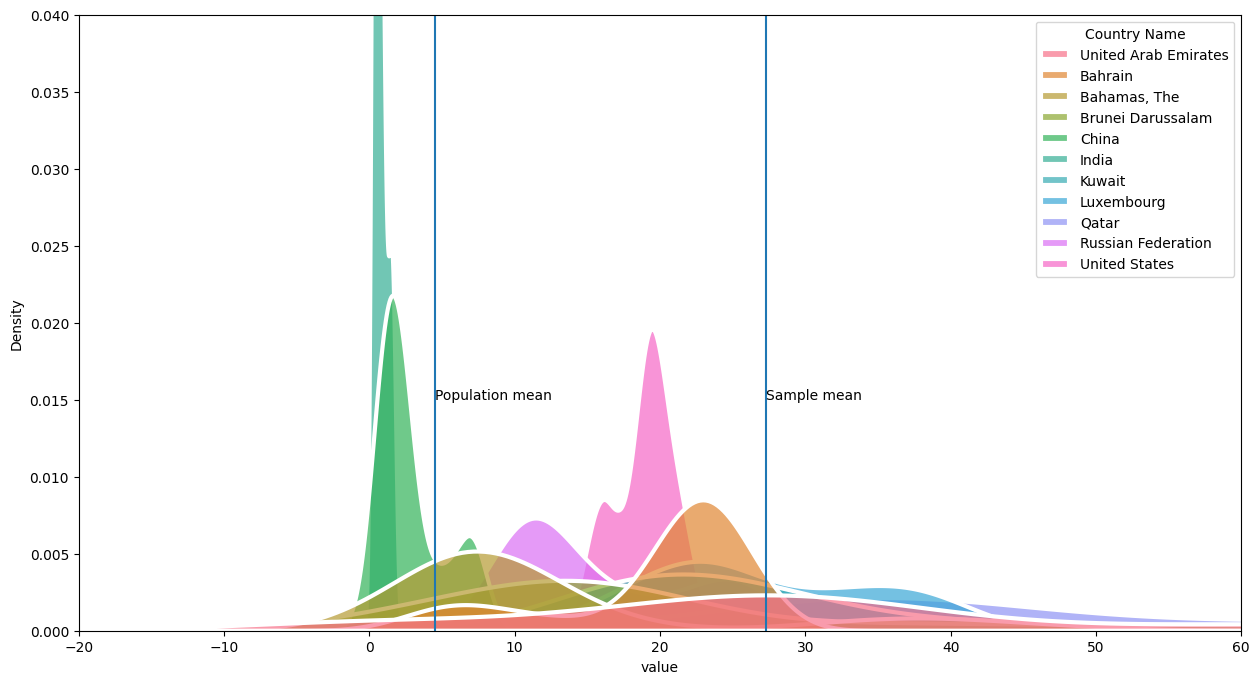

In [44]:
plt.figure(figsize=(15, 8))
ax = sns.kdeplot(
    data=df2[df2["Country Name"].isin(country_col)],
    x=df2["value"],
    hue="Country Name",
    fill=True,
    linewidth=3,
    edgecolor="white",
    alpha=0.7,
)
ax = plt.axvline(x=sample_mean)
# ax=sns.kdeplot(data=df2, x='value')
ax = plt.axvline(x=pop_mean)
ax = plt.text(x=sample_mean, y=0.015, s="Sample mean")
ax = plt.text(x=pop_mean, y=0.015, s="Population mean")
plt.xlim(-20, 60)
plt.ylim(0.00, 0.04)

In [35]:
px.box(
    data_frame=df2[df2["Country Name"].isin(country_col)],
    x="value",
    y="Country Name",
    color="Country Name",
    title="Variation of Carbon emission by top 12 countries",
)

In [36]:
df2["decade"] = 1
df2["decade"][df2["Year"].between("1960", "1970")] = "1960-1970"
df2["decade"][df2["Year"].between("1971", "1980")] = "1971-1980"
df2["decade"][df2["Year"].between("1981", "1990")] = "1981-1990"
df2["decade"][df2["Year"].between("1991", "2000")] = "1991-2000"
df2["decade"][df2["Year"].between("2001", "2010")] = "2001-2010"
df2["decade"][df2["Year"].between("2011", "2020")] = "2011-2018"

/tmp/ipykernel_190077/2223543588.py:2: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/tmp/ipykernel_190077/2223543588.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

In [37]:
px.box(
    data_frame=df2[df2["Country Name"].isin(country_col)],
    x="value",
    y="Country Name",
    color="Country Name",
    title="Variation of Carbon emission by top 12 countries",
    facet_col="decade",
)

**As we can see the country Aruba contributed high carbon emssion from 1960 - 1990, which shows high figure in the chart. after 1990, there is no much carbon emission from Aruba, in this case, let us remove Aruba to clearly view other countries data.**

In [38]:
country_col.remove("Aruba")

In [39]:
px.box(
    data_frame=df2[df2["Country Name"].isin(country_col)],
    x="value",
    y="Country Name",
    color="Country Name",
    title="Variation of Carbon emission by top 11 countries",
    facet_col="decade",
)

In [40]:
px.bar(
    data_frame=df2[df2["Country Name"].isin(country_col)].sort_values(
        by=["value"], ascending=False
    ),
    x="value",
    y="Country Name",
    facet_col="decade",
    color="Country Name",
    barmode="stack",
)

# Work is in progress, Please provide your feedback.